In [1]:
# Notes & solution by Akhona Njeje.
# Machine Learning metrics.
# 31 May 2024.

import numpy as np

# Given data
X1 = np.array([7, 14, 16, 3, 21, 8])
X2 = np.array([33, 41, 7, 49, 5, 31])
Y = np.array([42, 33, 75, 28, 91, 55])

In [2]:
# Fit the multiple linear regression model
X = np.column_stack((np.ones_like(X1), X1, X2))  # Add a column of ones for the intercept
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # Least squares estimator

In [3]:
Y_pred = X @ beta_hat

In [4]:
# Calculate residuals
residuals = Y - Y_pred

In [5]:
# Calculate total sum of squares (SST)
SST = np.sum((Y - np.mean(Y))**2)

In [6]:
# Calculate sum of squared residuals (SSR)
SSR = np.sum(residuals**2)

In [7]:
# Calculate R-squared (coefficient of determination)
R_squared = 1 - SSR / SST

In [8]:
print("R-squared (coefficient of determination):", R_squared)

R-squared (coefficient of determination): 0.9484275266021527


In [9]:
from scipy.stats import t

# Given data
X1 = np.array([7, 14, 16, 3, 21, 8])
X2 = np.array([33, 41, 7, 49, 5, 31])
Y = np.array([42, 33, 75, 28, 91, 55])

# Fit the multiple linear regression model
X = np.column_stack((np.ones_like(X1), X1, X2))  # Add a column of ones for the intercept
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # Least squares estimator

# Calculate residuals
residuals = Y - X @ beta_hat

In [10]:
# Calculate standard error of the coefficients
n = len(Y)  # number of observations
k = X.shape[1] - 1  # number of predictors (excluding intercept)
df = n - k - 1  # degrees of freedom
MSE = np.sum(residuals**2) / df  # Mean Squared Error
cov_beta_hat = MSE * np.linalg.inv(X.T @ X)  # Covariance matrix of beta_hat
SE_beta_hat = np.sqrt(np.diag(cov_beta_hat))  # Standard errors of beta_hat

In [11]:
# Calculate t-statistics for each coefficient
t_stat = beta_hat / SE_beta_hat

# Calculate critical value from t-distribution (two-tailed test)
alpha = 0.05  # significance level
t_critical = t.ppf(1 - alpha/2, df)

In [12]:
# Test for each coefficient
for i, beta in enumerate(beta_hat):
    t_val = t_stat[i]
    if np.abs(t_val) > t_critical:
        print(f"Coefficient {i}: Reject null hypothesis (significant)")
    else:
        print(f"Coefficient {i}: Fail to reject null hypothesis (not significant)")

# Note: Coefficient 0 corresponds to the intercept, Coefficient 1 corresponds to bet

Coefficient 0: Reject null hypothesis (significant)
Coefficient 1: Fail to reject null hypothesis (not significant)
Coefficient 2: Reject null hypothesis (significant)


In [13]:
# Fit the multiple linear regression model
X = np.column_stack((np.ones_like(X1), X1, X2))  # Add a column of ones for the intercept
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # Least squares estimator

# Calculate predicted values
Y_pred = X @ beta_hat

# Calculate residuals
residuals = Y - Y_pred

Text(0, 0.5, 'Residuals')

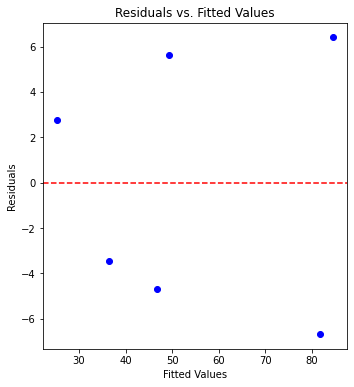

In [15]:
import matplotlib.pyplot as plt

# Plot residuals vs. fitted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

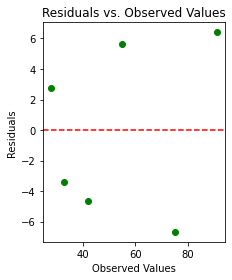

In [16]:
plt.subplot(1, 2, 2)
plt.scatter(Y, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()